# One Sample T-Test

Test formula:

# $ t_{one-sample} = \frac{\overline{x}-\mu}{SE_{\overline{x}}} $

Subcomponents of test formula:

## $ SE_{\overline{x}} = \sqrt{\frac{s^2}{n}} $

### $ s^2 = \frac{\sum_{i=1}^{n}(x_i - \overline{x})^2} {df} $

Coin toss = Tails
If coin toss = "Heads" then the sample was drawn from a population with a mean of 99.84
If coin toss = "Tails" then the sample was drawn from a population with a mean of 149.6005

Population mean that the sample is being tested against = 99.84
Sample mean = 148.976

Manually calculated One Sample T = 57.68495
scipy.stats one sample t test result: t = 57.68495296687656 p= 7.053713622564063e-223


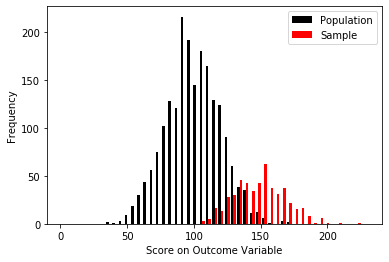

R-squared = 0.87


In [10]:
# one sample t test

import numpy as np
import scipy.stats
import statistics as stats
import random
import math
import matplotlib.pyplot as plt

# generating two populations with different means

population_1 = []

population_2 = []

for i in range(2000):
    population_1.append(round(20*np.random.randn() + 100))
    
for i in range(2000):
    population_2.append(round(20*np.random.randn() + 150))
    
# calculating the mean of population 1

pop_mean = stats.mean(population_1)

# making a 'coin toss' to determine whether a sample is drawn from population 1 or population 2 (which have different means)

coin = ['Heads', 'Tails']

coin_toss = np.random.choice(coin)

print('Coin toss =', coin_toss)
print('If coin toss = "Heads" then the sample was drawn from a population with a mean of', pop_mean)
print('If coin toss = "Tails" then the sample was drawn from a population with a mean of', stats.mean(population_2))
print()

if coin_toss == 'Heads':
    sample = random.sample(population_1, 500)
    
if coin_toss == 'Tails':
    sample = random.sample(population_2, 500)
    
# calculating the sample mean

x_bar = stats.mean(sample)

# calculating the estimated standard error of x_bar

sq_dev = []


count = 0
for i in sample:
    sq_dev.append((sample[count]-x_bar)**2)
    count = count + 1
    
df = len(sample)-1

sample_var = sum(sq_dev)/df

est_SE = math.sqrt(sample_var/len(sample))

# calculating the one sample t-statistics

t_one_sample = (x_bar-pop_mean)/est_SE

# printing results


print('Population mean that the sample is being tested against =', pop_mean)
print('Sample mean =', x_bar)
print()
print('Manually calculated One Sample T =', round(t_one_sample, 5))

# checking result with scipy.stats one sample t-test

scipy_result = scipy.stats.ttest_1samp(sample,pop_mean)

print('scipy.stats one sample t test result: t =', scipy_result[0],'p=', scipy_result[1])

# plotting the data
bins = np.linspace(1,230)
plt.hist([population_1, sample],bins, label = ['Population', 'Sample'], color = ['black', 'red'])
plt.xlabel('Score on Outcome Variable')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.show()

# calculating the effect size

r_squared = t_one_sample**2/(t_one_sample**2 + (len(sample)-1))

print('R-squared =', round(r_squared,2))